In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from exnn import ExNN

def data_generator1(datanum, testnum=10000, noise_sigma=1, rand_seed=0):
    
    corr = 0.5
    np.random.seed(rand_seed)
    proj_matrix = np.zeros((10, 4))
    proj_matrix[:7, 0] = np.array([1,0,0,0,0,0,0])
    proj_matrix[:7, 1] = np.array([0,1,0,0,0,0,0])
    proj_matrix[:7, 2] = np.array([0,0,0.5,0.5,0,0,0])
    proj_matrix[:7, 3] = np.array([0,0,0,0,0.2,0.3,0.5])
    u = np.random.uniform(-1, 1, [datanum + testnum, 1])
    t = np.sqrt(corr / (1 - corr))
    x = np.zeros((datanum + testnum, 10))
    for i in range(10):
        x[:, i:i + 1] = (np.random.uniform(-1, 1, [datanum + testnum, 1]) + t * u) / (1 + t)

    y = np.reshape(2 * np.dot(x, proj_matrix[:, 0]) + 0.2 * np.exp(-4 * np.dot(x, proj_matrix[:, 1])) + \
                   3 * (np.dot(x, proj_matrix[:, 2]))**2 + 2.5 * np.sin(np.pi * np.dot(x, proj_matrix[:, 3])), [-1, 1]) + \
              noise_sigma * np.random.normal(0, 1, [datanum + testnum, 1])
    
    task_type = "Regression"
    meta_info = {"X1":{"type":"continuous"},
             "X2":{"type":"continuous"},
             "X3":{"type":"continuous"},
             "X4":{"type":"continuous"},
             "X5":{"type":"continuous"},
             "X6":{"type":"continuous"},
             "X7":{"type":"continuous"},
             "X8":{"type":"continuous"},
             "X9":{"type":"continuous"},
             "X10":{"type":"continuous"},
             "Y":{"type":"target"}}
    for i, (key, item) in enumerate(meta_info.items()):
        if item['type'] == "target":
            sy = MinMaxScaler((-1, 1))
            y = sy.fit_transform(y)
            meta_info[key]["scaler"] = sy
        elif item['type'] == "categorical":
            enc = OrdinalEncoder()
            enc.fit(x[:,[i]])
            ordinal_feature = enc.transform(x[:,[i]])
            x[:,[i]] = ordinal_feature
            meta_info[key]["values"] = enc.categories_[0].tolist()
        else:
            sx = MinMaxScaler((-1, 1))
            x[:,[i]] = sx.fit_transform(x[:,[i]])
            meta_info[key]["scaler"] = sx

    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=testnum, random_state=rand_seed)
    return train_x, test_x, train_y, test_y, task_type, meta_info

train_x, test_x, train_y, test_y, task_type, meta_info = data_generator1(datanum=10000, testnum=10000, noise_sigma=1, rand_seed=0)
model = ExNN(meta_info=meta_info,
               subnet_num=10,
               subnet_arch=[10, 6],
               task_type=task_type,
               activation_func=tf.tanh,
               batch_size=min(1000, int(train_x.shape[0] * 0.2)),
               training_epochs=5000,
               lr_bp=0.001,
               lr_cl=0.1,
               beta_threshold=0.05,
               tuning_epochs=100,
               l1_proj=0.0001,
               l1_subnet=0.00316,
               l2_smooth=10**(-6),
               verbose=True,
               val_ratio=0.2,
               early_stop_thres=200)

model.fit(train_x, train_y)

Initial training.
Training epoch: 1, train loss: 0.15248, val loss: 0.15325
Training epoch: 2, train loss: 0.13367, val loss: 0.13557
Training epoch: 3, train loss: 0.11582, val loss: 0.11764
Training epoch: 4, train loss: 0.09918, val loss: 0.10050
Training epoch: 5, train loss: 0.08543, val loss: 0.08640
Training epoch: 6, train loss: 0.07818, val loss: 0.07827
Training epoch: 7, train loss: 0.06875, val loss: 0.06865
Training epoch: 8, train loss: 0.06563, val loss: 0.06523
Training epoch: 9, train loss: 0.05757, val loss: 0.05775
Training epoch: 10, train loss: 0.05770, val loss: 0.05791
Training epoch: 11, train loss: 0.04955, val loss: 0.05008
Training epoch: 12, train loss: 0.04903, val loss: 0.04945
Training epoch: 13, train loss: 0.04844, val loss: 0.04874
Training epoch: 14, train loss: 0.04466, val loss: 0.04488
Training epoch: 15, train loss: 0.04277, val loss: 0.04296
Training epoch: 16, train loss: 0.03933, val loss: 0.03972
Training epoch: 17, train loss: 0.04030, val lo

Training epoch: 141, train loss: 0.02019, val loss: 0.02076
Training epoch: 142, train loss: 0.01987, val loss: 0.02043
Training epoch: 143, train loss: 0.01997, val loss: 0.02046
Training epoch: 144, train loss: 0.01988, val loss: 0.02035
Training epoch: 145, train loss: 0.01988, val loss: 0.02046
Training epoch: 146, train loss: 0.01991, val loss: 0.02040
Training epoch: 147, train loss: 0.01995, val loss: 0.02058
Training epoch: 148, train loss: 0.02026, val loss: 0.02087
Training epoch: 149, train loss: 0.01972, val loss: 0.02024
Training epoch: 150, train loss: 0.02097, val loss: 0.02165
Training epoch: 151, train loss: 0.01993, val loss: 0.02054
Training epoch: 152, train loss: 0.02037, val loss: 0.02087
Training epoch: 153, train loss: 0.01970, val loss: 0.02024
Training epoch: 154, train loss: 0.02011, val loss: 0.02082
Training epoch: 155, train loss: 0.01970, val loss: 0.02024
Training epoch: 156, train loss: 0.01988, val loss: 0.02050
Training epoch: 157, train loss: 0.01963

Training epoch: 282, train loss: 0.01782, val loss: 0.01853
Training epoch: 283, train loss: 0.01800, val loss: 0.01867
Training epoch: 284, train loss: 0.01795, val loss: 0.01855
Training epoch: 285, train loss: 0.01767, val loss: 0.01831
Training epoch: 286, train loss: 0.01791, val loss: 0.01875
Training epoch: 287, train loss: 0.01810, val loss: 0.01886
Training epoch: 288, train loss: 0.01813, val loss: 0.01887
Training epoch: 289, train loss: 0.01770, val loss: 0.01835
Training epoch: 290, train loss: 0.01797, val loss: 0.01858
Training epoch: 291, train loss: 0.01809, val loss: 0.01890
Training epoch: 292, train loss: 0.01807, val loss: 0.01889
Training epoch: 293, train loss: 0.01761, val loss: 0.01832
Training epoch: 294, train loss: 0.01783, val loss: 0.01867
Training epoch: 295, train loss: 0.01821, val loss: 0.01909
Training epoch: 296, train loss: 0.01758, val loss: 0.01834
Training epoch: 297, train loss: 0.01767, val loss: 0.01839
Training epoch: 298, train loss: 0.01821

Training epoch: 421, train loss: 0.01682, val loss: 0.01748
Training epoch: 422, train loss: 0.01670, val loss: 0.01739
Training epoch: 423, train loss: 0.01684, val loss: 0.01747
Training epoch: 424, train loss: 0.01662, val loss: 0.01727
Training epoch: 425, train loss: 0.01688, val loss: 0.01757
Training epoch: 426, train loss: 0.01641, val loss: 0.01703
Training epoch: 427, train loss: 0.01650, val loss: 0.01716
Training epoch: 428, train loss: 0.01677, val loss: 0.01744
Training epoch: 429, train loss: 0.01677, val loss: 0.01750
Training epoch: 430, train loss: 0.01828, val loss: 0.01911
Training epoch: 431, train loss: 0.01657, val loss: 0.01719
Training epoch: 432, train loss: 0.01645, val loss: 0.01707
Training epoch: 433, train loss: 0.01660, val loss: 0.01726
Training epoch: 434, train loss: 0.01664, val loss: 0.01735
Training epoch: 435, train loss: 0.01712, val loss: 0.01777
Training epoch: 436, train loss: 0.01638, val loss: 0.01702
Training epoch: 437, train loss: 0.01711

Training epoch: 561, train loss: 0.01661, val loss: 0.01731
Training epoch: 562, train loss: 0.01613, val loss: 0.01679
Training epoch: 563, train loss: 0.01722, val loss: 0.01802
Training epoch: 564, train loss: 0.01617, val loss: 0.01679
Training epoch: 565, train loss: 0.01674, val loss: 0.01727
Training epoch: 566, train loss: 0.01683, val loss: 0.01751
Training epoch: 567, train loss: 0.01655, val loss: 0.01713
Training epoch: 568, train loss: 0.01641, val loss: 0.01707
Training epoch: 569, train loss: 0.01635, val loss: 0.01706
Training epoch: 570, train loss: 0.01617, val loss: 0.01678
Training epoch: 571, train loss: 0.01610, val loss: 0.01674
Training epoch: 572, train loss: 0.01610, val loss: 0.01667
Training epoch: 573, train loss: 0.01601, val loss: 0.01668
Training epoch: 574, train loss: 0.01693, val loss: 0.01763
Training epoch: 575, train loss: 0.01624, val loss: 0.01694
Training epoch: 576, train loss: 0.01600, val loss: 0.01662
Training epoch: 577, train loss: 0.01644

Training epoch: 701, train loss: 0.01594, val loss: 0.01661
Training epoch: 702, train loss: 0.01657, val loss: 0.01719
Training epoch: 703, train loss: 0.01659, val loss: 0.01727
Training epoch: 704, train loss: 0.01616, val loss: 0.01681
Training epoch: 705, train loss: 0.01602, val loss: 0.01670
Training epoch: 706, train loss: 0.01604, val loss: 0.01663
Training epoch: 707, train loss: 0.01624, val loss: 0.01684
Training epoch: 708, train loss: 0.01604, val loss: 0.01670
Training epoch: 709, train loss: 0.01618, val loss: 0.01689
Training epoch: 710, train loss: 0.01597, val loss: 0.01668
Training epoch: 711, train loss: 0.01624, val loss: 0.01693
Training epoch: 712, train loss: 0.01668, val loss: 0.01741
Training epoch: 713, train loss: 0.01683, val loss: 0.01751
Training epoch: 714, train loss: 0.01627, val loss: 0.01691
Training epoch: 715, train loss: 0.01641, val loss: 0.01708
Training epoch: 716, train loss: 0.01596, val loss: 0.01660
Training epoch: 717, train loss: 0.01622

Training epoch: 838, train loss: 0.01591, val loss: 0.01655
Training epoch: 839, train loss: 0.01563, val loss: 0.01629
Training epoch: 840, train loss: 0.01587, val loss: 0.01657
Training epoch: 841, train loss: 0.01625, val loss: 0.01692
Training epoch: 842, train loss: 0.01564, val loss: 0.01625
Training epoch: 843, train loss: 0.01563, val loss: 0.01633
Training epoch: 844, train loss: 0.01571, val loss: 0.01638
Training epoch: 845, train loss: 0.01559, val loss: 0.01622
Training epoch: 846, train loss: 0.01565, val loss: 0.01629
Training epoch: 847, train loss: 0.01562, val loss: 0.01629
Training epoch: 848, train loss: 0.01598, val loss: 0.01665
Training epoch: 849, train loss: 0.01614, val loss: 0.01690
Training epoch: 850, train loss: 0.01561, val loss: 0.01628
Training epoch: 851, train loss: 0.01774, val loss: 0.01844
Training epoch: 852, train loss: 0.01625, val loss: 0.01686
Training epoch: 853, train loss: 0.01595, val loss: 0.01664
Training epoch: 854, train loss: 0.01553

Training epoch: 976, train loss: 0.01589, val loss: 0.01648
Training epoch: 977, train loss: 0.01592, val loss: 0.01653
Training epoch: 978, train loss: 0.01581, val loss: 0.01646
Training epoch: 979, train loss: 0.01537, val loss: 0.01599
Training epoch: 980, train loss: 0.01560, val loss: 0.01623
Training epoch: 981, train loss: 0.01664, val loss: 0.01729
Training epoch: 982, train loss: 0.01558, val loss: 0.01615
Training epoch: 983, train loss: 0.01572, val loss: 0.01630
Training epoch: 984, train loss: 0.01583, val loss: 0.01640
Training epoch: 985, train loss: 0.01574, val loss: 0.01635
Training epoch: 986, train loss: 0.01544, val loss: 0.01608
Training epoch: 987, train loss: 0.01576, val loss: 0.01637
Training epoch: 988, train loss: 0.01547, val loss: 0.01606
Training epoch: 989, train loss: 0.01538, val loss: 0.01600
Training epoch: 990, train loss: 0.01536, val loss: 0.01600
Training epoch: 991, train loss: 0.01543, val loss: 0.01602
Training epoch: 992, train loss: 0.01561

Training epoch: 1113, train loss: 0.01568, val loss: 0.01627
Training epoch: 1114, train loss: 0.01537, val loss: 0.01590
Training epoch: 1115, train loss: 0.01558, val loss: 0.01615
Training epoch: 1116, train loss: 0.01547, val loss: 0.01605
Training epoch: 1117, train loss: 0.01552, val loss: 0.01605
Training epoch: 1118, train loss: 0.01544, val loss: 0.01600
Training epoch: 1119, train loss: 0.01552, val loss: 0.01610
Training epoch: 1120, train loss: 0.01534, val loss: 0.01591
Training epoch: 1121, train loss: 0.01533, val loss: 0.01588
Training epoch: 1122, train loss: 0.01547, val loss: 0.01602
Training epoch: 1123, train loss: 0.01526, val loss: 0.01582
Training epoch: 1124, train loss: 0.01549, val loss: 0.01604
Training epoch: 1125, train loss: 0.01581, val loss: 0.01635
Training epoch: 1126, train loss: 0.01554, val loss: 0.01607
Training epoch: 1127, train loss: 0.01585, val loss: 0.01641
Training epoch: 1128, train loss: 0.01553, val loss: 0.01606
Training epoch: 1129, tr

Training epoch: 1250, train loss: 0.01539, val loss: 0.01590
Training epoch: 1251, train loss: 0.01533, val loss: 0.01585
Training epoch: 1252, train loss: 0.01562, val loss: 0.01614
Training epoch: 1253, train loss: 0.01524, val loss: 0.01574
Training epoch: 1254, train loss: 0.01553, val loss: 0.01601
Training epoch: 1255, train loss: 0.01529, val loss: 0.01579
Training epoch: 1256, train loss: 0.01534, val loss: 0.01588
Training epoch: 1257, train loss: 0.01532, val loss: 0.01581
Training epoch: 1258, train loss: 0.01528, val loss: 0.01578
Training epoch: 1259, train loss: 0.01640, val loss: 0.01694
Training epoch: 1260, train loss: 0.01532, val loss: 0.01582
Training epoch: 1261, train loss: 0.01548, val loss: 0.01595
Training epoch: 1262, train loss: 0.01532, val loss: 0.01584
Training epoch: 1263, train loss: 0.01582, val loss: 0.01637
Training epoch: 1264, train loss: 0.01577, val loss: 0.01628
Training epoch: 1265, train loss: 0.01554, val loss: 0.01608
Training epoch: 1266, tr

Training epoch: 1385, train loss: 0.01563, val loss: 0.01614
Training epoch: 1386, train loss: 0.01543, val loss: 0.01592
Training epoch: 1387, train loss: 0.01533, val loss: 0.01580
Training epoch: 1388, train loss: 0.01534, val loss: 0.01583
Training epoch: 1389, train loss: 0.01525, val loss: 0.01575
Training epoch: 1390, train loss: 0.01562, val loss: 0.01612
Training epoch: 1391, train loss: 0.01537, val loss: 0.01586
Training epoch: 1392, train loss: 0.01547, val loss: 0.01599
Training epoch: 1393, train loss: 0.01569, val loss: 0.01618
Training epoch: 1394, train loss: 0.01536, val loss: 0.01585
Training epoch: 1395, train loss: 0.01540, val loss: 0.01591
Training epoch: 1396, train loss: 0.01554, val loss: 0.01607
Training epoch: 1397, train loss: 0.01552, val loss: 0.01600
Training epoch: 1398, train loss: 0.01535, val loss: 0.01580
Training epoch: 1399, train loss: 0.01591, val loss: 0.01645
Training epoch: 1400, train loss: 0.01532, val loss: 0.01580
Training epoch: 1401, tr

Training epoch: 1522, train loss: 0.01523, val loss: 0.01571
Training epoch: 1523, train loss: 0.01559, val loss: 0.01602
Training epoch: 1524, train loss: 0.01528, val loss: 0.01574
Training epoch: 1525, train loss: 0.01594, val loss: 0.01644
Training epoch: 1526, train loss: 0.01524, val loss: 0.01570
Training epoch: 1527, train loss: 0.01593, val loss: 0.01634
Training epoch: 1528, train loss: 0.01543, val loss: 0.01592
Training epoch: 1529, train loss: 0.01553, val loss: 0.01600
Training epoch: 1530, train loss: 0.01527, val loss: 0.01574
Training epoch: 1531, train loss: 0.01539, val loss: 0.01587
Training epoch: 1532, train loss: 0.01577, val loss: 0.01631
Training epoch: 1533, train loss: 0.01553, val loss: 0.01602
Training epoch: 1534, train loss: 0.01578, val loss: 0.01627
Training epoch: 1535, train loss: 0.01556, val loss: 0.01597
Training epoch: 1536, train loss: 0.01540, val loss: 0.01586
Training epoch: 1537, train loss: 0.01540, val loss: 0.01582
Training epoch: 1538, tr

Tuning epoch: 85, train loss: 0.01542, val loss: 0.01597
Tuning epoch: 86, train loss: 0.01547, val loss: 0.01601
Tuning epoch: 87, train loss: 0.01552, val loss: 0.01609
Tuning epoch: 88, train loss: 0.01583, val loss: 0.01637
Tuning epoch: 89, train loss: 0.01546, val loss: 0.01597
Tuning epoch: 90, train loss: 0.01615, val loss: 0.01674
Tuning epoch: 91, train loss: 0.01579, val loss: 0.01635
Tuning epoch: 92, train loss: 0.01570, val loss: 0.01621
Tuning epoch: 93, train loss: 0.01569, val loss: 0.01624
Tuning epoch: 94, train loss: 0.01559, val loss: 0.01616
Tuning epoch: 95, train loss: 0.01543, val loss: 0.01597
Tuning epoch: 96, train loss: 0.01538, val loss: 0.01592
Tuning epoch: 97, train loss: 0.01608, val loss: 0.01663
Tuning epoch: 98, train loss: 0.01538, val loss: 0.01591
Tuning epoch: 99, train loss: 0.01546, val loss: 0.01604
Tuning epoch: 100, train loss: 0.01555, val loss: 0.01610


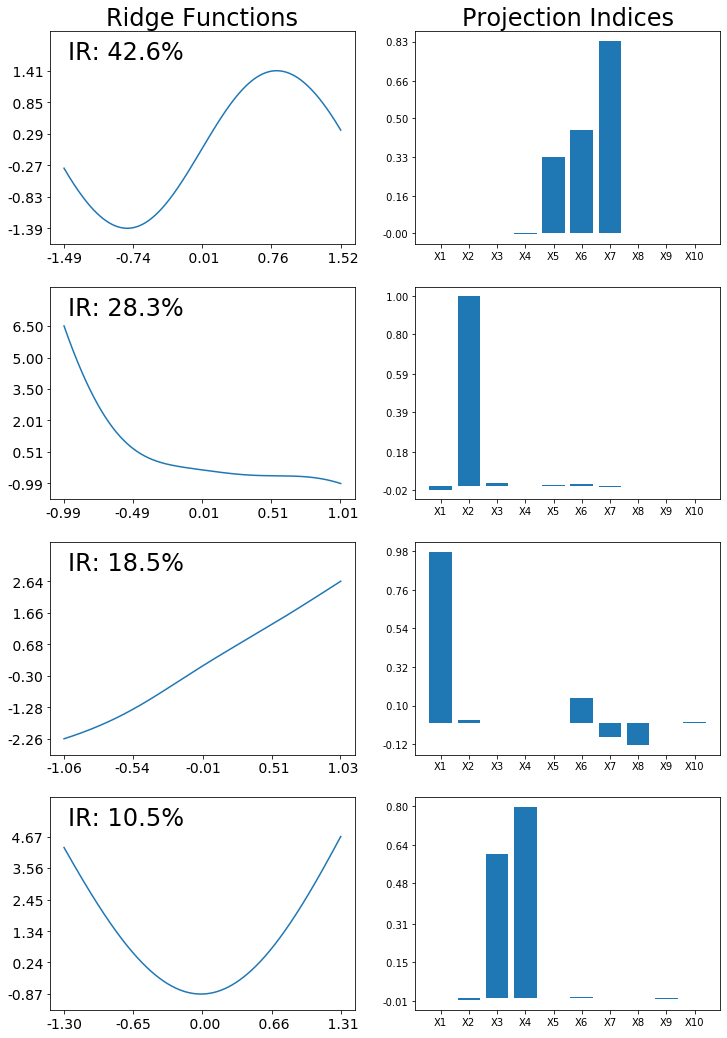

In [2]:
model.visualize(folder="./", name="exnn_demo")

In [3]:
model.visualize_new(cols_per_row=3, subnet_num=3, dummy_subnet_num=0, folder="./", name="exnn_demo")

NameError: name 'active_subnets_' is not defined